In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("C:\\Users\\SATYA GAYATHRI\\OneDrive\\Documents\\Data science\\datasets\\heart_disease.xlsx",sheet_name='Heart_disease')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [3]:
df.shape

(908, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [6]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [7]:
# we can see missing values in oldpeak so i am going to fill it

In [8]:
df["oldpeak"].fillna(df["oldpeak"].median(),inplace=True)

C:\Users\SATYA GAYATHRI\AppData\Local\Temp\ipykernel_2432\3397919899.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["oldpeak"].fillna(df["oldpeak"].median(),inplace=True)


In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [10]:
# as i have more columns i am going to do histograms at a time

In [11]:
import matplotlib.pyplot as plt

np.float64(-0.13679653817221868)

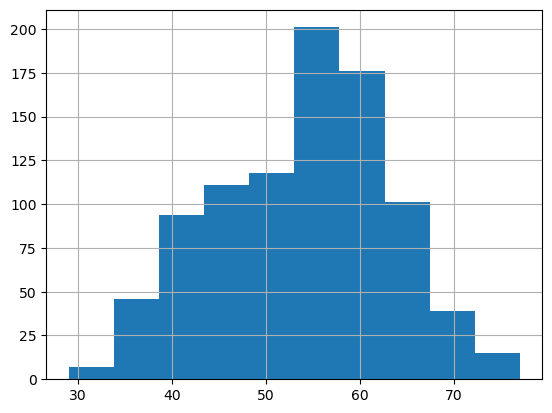

In [12]:
df["age"].hist()
df["age"].skew()

<Axes: title={'center': 'Boxplot'}>

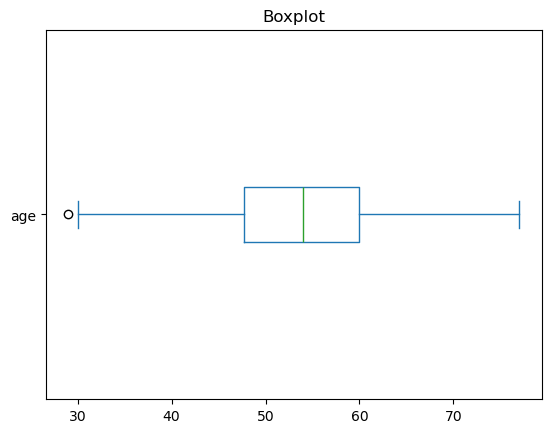

In [13]:
boxplot_age = df["age"].plot(kind="box",vert=False,title="Boxplot")
boxplot_age

In [14]:
Q1 = np.percentile(df["age"],25)
Q3 = np.percentile(df["age"],75)
IQR = Q3-Q1
IQR

np.float64(12.25)

In [15]:
UW = Q3 + (1.5*IQR)
UW

np.float64(78.375)

In [16]:
print("#outliers:",len(df[df["age"]>UW]))

#outliers: 0


In [17]:
LW = Q3 - (1.5*IQR)
LW

np.float64(41.625)

In [18]:
print("#outliers:",len(df[df["age"]<LW]))

#outliers: 105


In [19]:
df.loc[df["age"] < LW, "age"] = LW

C:\Users\SATYA GAYATHRI\AppData\Local\Temp\ipykernel_2432\2136197742.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '41.625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["age"] < LW, "age"] = LW


In [20]:
df["age"].describe()

count    908.000000
mean      54.212142
std        8.428498
min       41.625000
25%       47.750000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

np.float64(0.3536499733817675)

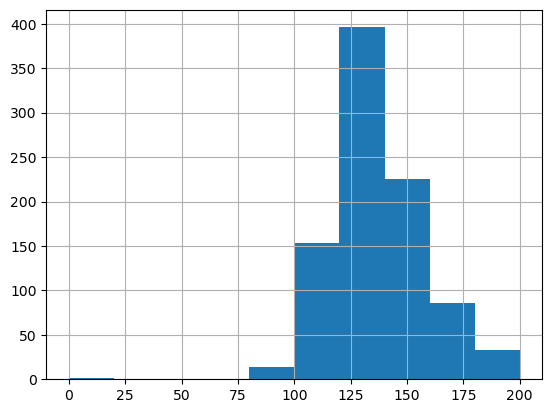

In [21]:
df["trestbps"].hist()
df["trestbps"].skew()

<Axes: title={'center': 'boxplot'}>

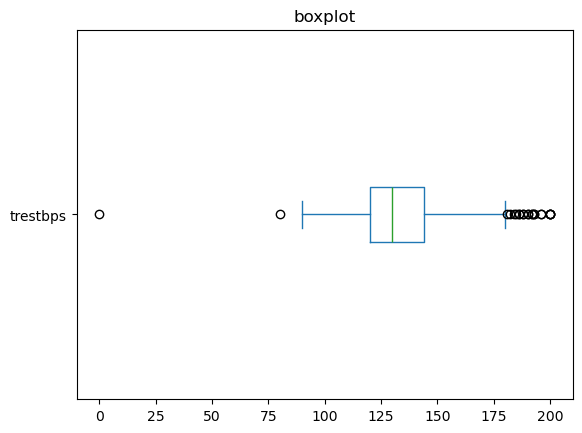

In [22]:
boxplot_trestbps = df["trestbps"].plot(kind="box",vert=False,title="boxplot")
boxplot_trestbps

In [23]:
Q1 = np.percentile(df["trestbps"],25)
Q3 = np.percentile(df["trestbps"],75)
IQR = Q3-Q1
IQR

np.float64(24.0)

In [24]:
UW = Q3 + (1.5*IQR)
UW

np.float64(180.0)

In [25]:
print("#outliers:",len(df[df["trestbps"]>UW]))

#outliers: 20


In [26]:
df.loc[df["trestbps"] > UW, "trestbps"] = UW

In [27]:
df["trestbps"].describe()

count    908.000000
mean     133.186123
std       19.744832
min        0.000000
25%      120.000000
50%      130.000000
75%      144.000000
max      180.000000
Name: trestbps, dtype: float64

<Axes: title={'center': 'boxplot'}>

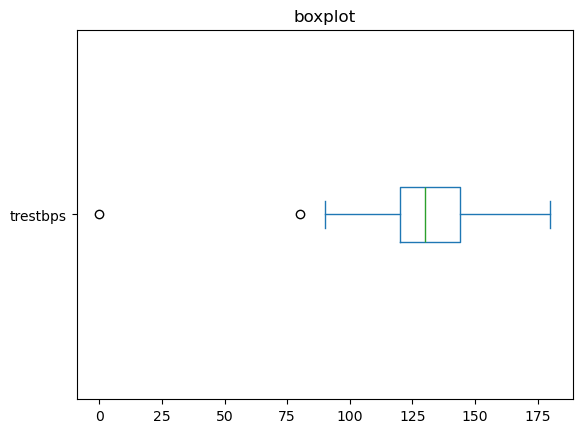

In [28]:
boxplot_trestbps = df["trestbps"].plot(kind="box",vert=False,title="boxplot")
boxplot_trestbps

In [29]:
LW = Q3 - (1.5*IQR)
LW

np.float64(108.0)

In [30]:
print("#outliers:",len(df[df["trestbps"]<LW]))

#outliers: 51


<Axes: title={'center': 'boxplot'}>

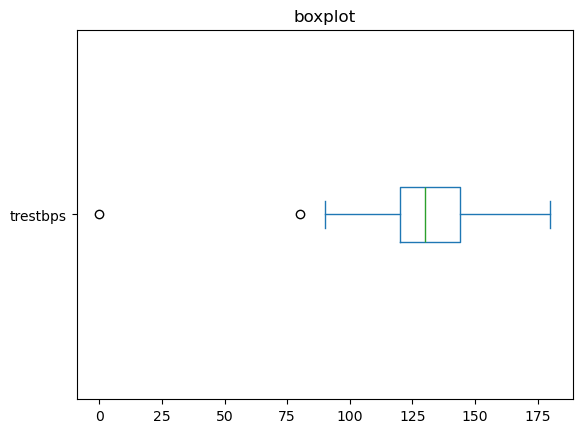

In [31]:
boxplot_trestbps = df["trestbps"].plot(kind="box",vert=False,title="boxplot")
boxplot_trestbps

np.float64(-0.564765692042219)

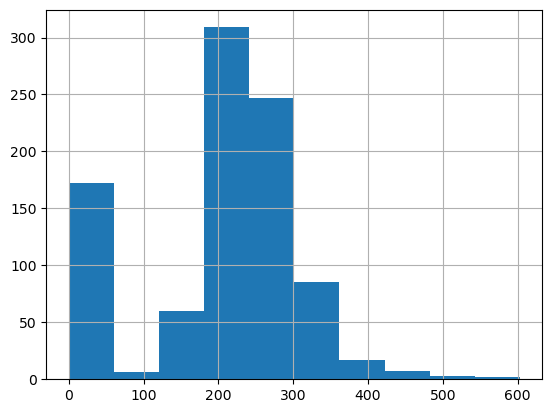

In [32]:
df["chol"].hist()
df["chol"].skew()

<Axes: title={'center': 'boxplot'}>

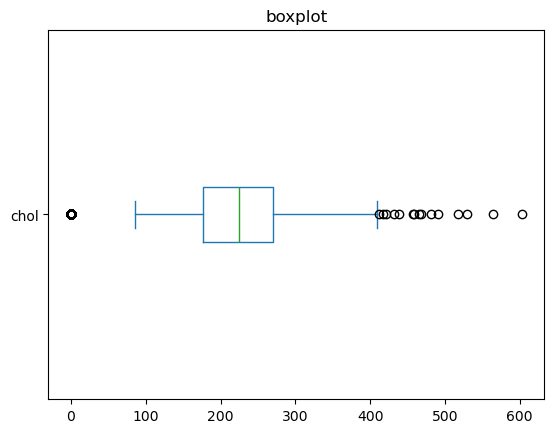

In [33]:
boxplot_chol = df["chol"].plot(kind="box",vert=False,title="boxplot")
boxplot_chol

In [34]:
Q1 = np.percentile(df["chol"],25)
Q3 = np.percentile(df["chol"],75)
IQR = Q3-Q1
IQR

np.float64(93.25)

In [35]:
UW = Q3 + (1.5*IQR)
UW

np.float64(409.875)

In [36]:
print("#outliers:",len(df[df["chol"]>UW]))

#outliers: 15


In [37]:
LW = Q3 - (1.5*IQR)
LW

np.float64(130.125)

In [38]:
print("#outliers:",len(df[df["chol"]<LW]))

#outliers: 182


In [39]:
df.loc[df["chol"] < LW, "chol"] = LW

C:\Users\SATYA GAYATHRI\AppData\Local\Temp\ipykernel_2432\762789071.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '130.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["chol"] < LW, "chol"] = LW


In [40]:
df["chol"].describe()

count    908.000000
mean     226.316905
std       72.002057
min      130.125000
25%      176.750000
50%      224.000000
75%      270.000000
max      603.000000
Name: chol, dtype: float64

<Axes: title={'center': 'boxplot'}>

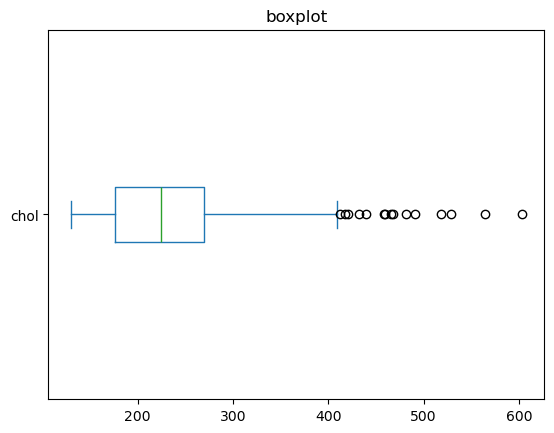

In [41]:
boxplot_chol = df["chol"].plot(kind="box",vert=False,title="boxplot")
boxplot_chol

<Axes: >

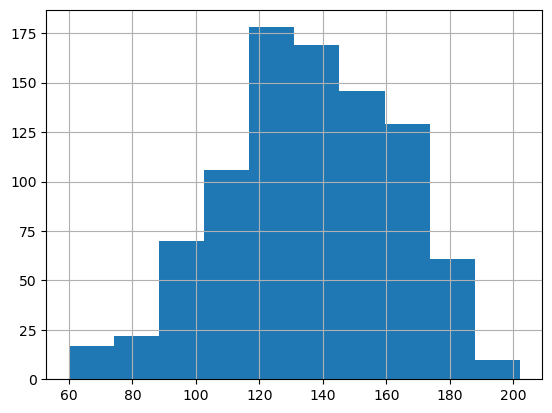

In [42]:
df["thalch"].skew()
df["thalch"].hist()

<Axes: title={'center': 'boxplot'}>

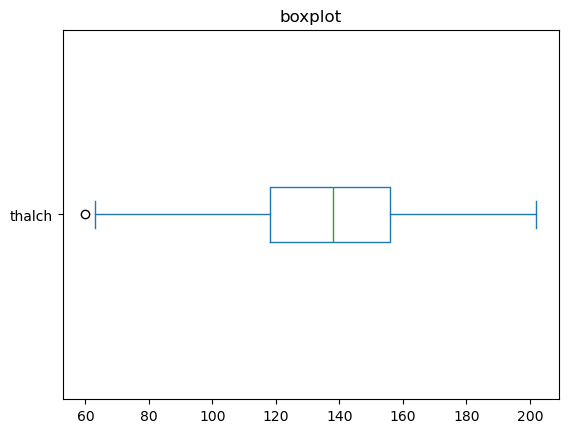

In [43]:
boxplot_thalch = df["thalch"].plot(kind="box",vert=False,title="boxplot")
boxplot_thalch

In [44]:
Q1 = np.percentile(df["thalch"],25)
Q3 = np.percentile(df["thalch"],75)
IQR = Q3-Q1
IQR

np.float64(38.0)

In [45]:
LW = Q3 - (1.5*IQR)
LW

np.float64(99.0)

In [46]:
print("#outliers:",len(df[df["thalch"]<LW]))

#outliers: 81


In [47]:
UW = Q3 + (1.5*IQR)
UW

np.float64(213.0)

In [48]:
print("#outliers:",len(df[df["thalch"]>UW]))

#outliers: 0


In [49]:
df.loc[df["thalch"]< LW, "thalch"] = LW

In [50]:
df["thalch"].describe()

count    908.000000
mean     137.092511
std       24.677015
min       99.000000
25%      118.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: thalch, dtype: float64

<Axes: title={'center': 'boxplot'}>

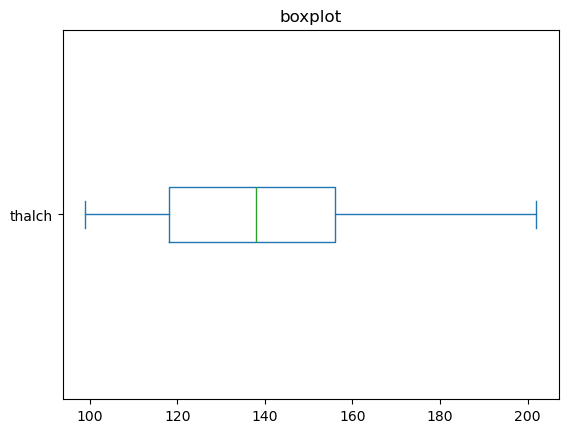

In [51]:
boxplot_thalch = df["thalch"].plot(kind="box",vert=False,title="boxplot")
boxplot_thalch

np.float64(1.1169442916724792)

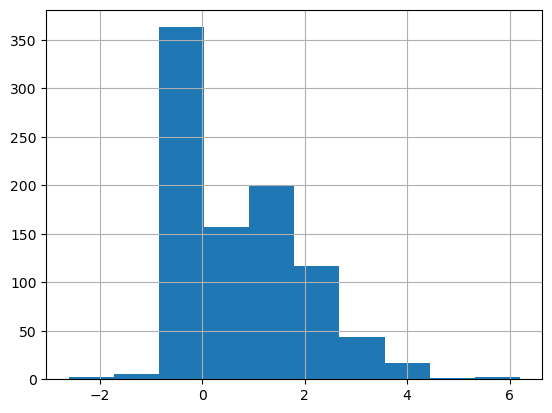

In [52]:
df["oldpeak"].hist()
df["oldpeak"].skew()

<Axes: title={'center': 'Boxplot'}>

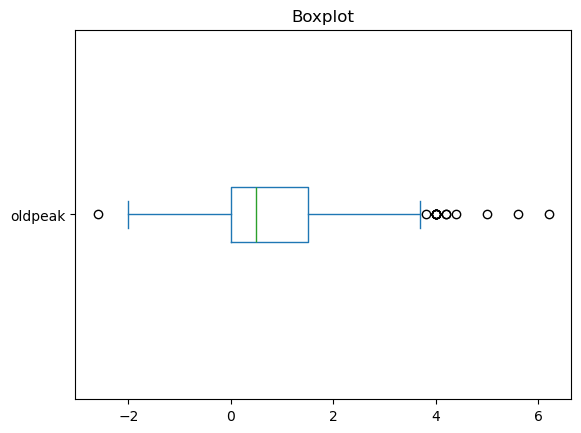

In [53]:
boxplot_oldpeak = df["oldpeak"].plot(kind="box",vert=False,title="Boxplot")
boxplot_oldpeak

In [54]:
Q1 = np.percentile(df["oldpeak"],25)
Q3 = np.percentile(df["oldpeak"],75)
IQR = Q3-Q1
IQR

np.float64(1.5)

In [55]:
UW = Q3 + (1.5*IQR)
UW

np.float64(3.75)

In [56]:
print("#outliers:",len(df[df["oldpeak"]>UW]))

#outliers: 15


In [57]:
df.loc[df["oldpeak"] > UW, "oldpeak"] = UW

In [58]:
df["oldpeak"].describe()

count    908.000000
mean       0.854460
std        1.025972
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        3.750000
Name: oldpeak, dtype: float64

<Axes: title={'center': 'Boxplot'}>

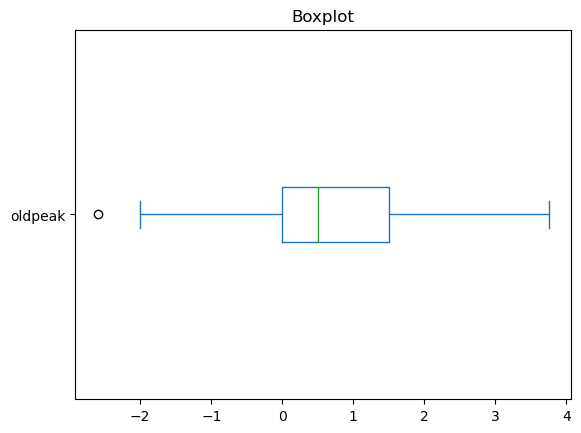

In [59]:
boxplot_oldpeak = df["oldpeak"].plot(kind="box",vert=False,title="Boxplot")
boxplot_oldpeak

In [60]:
LW = Q3 - (1.5*IQR)
LW

np.float64(-0.75)

In [61]:
print("#outliers:",len(df[df["oldpeak"]<LW]))

#outliers: 8


In [62]:
df.loc[df["oldpeak"] < LW, "oldpeak"] = LW

<Axes: title={'center': 'Boxplot'}>

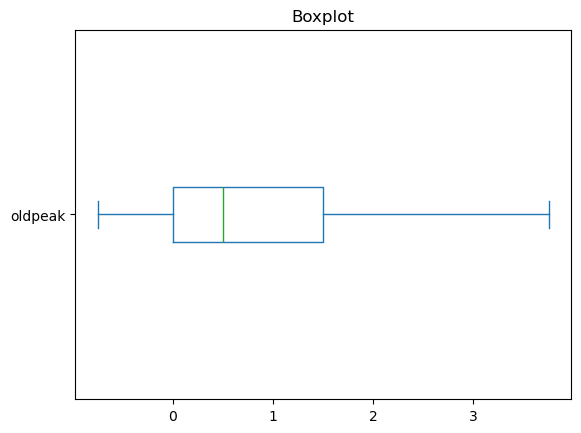

In [63]:
boxplot_oldpeak = df["oldpeak"].plot(kind="box",vert=False,title="Boxplot")
boxplot_oldpeak

In [64]:
# standardizing the data

In [65]:
# for binary columns im using mapping not to make it complicated

In [66]:
df['sex'] = df['sex'].map({'Male':1, 'Female':0})
df['fbs'] = df['fbs'].astype(int)
df['exang'] = df['exang'].map({'True':1, 'False':0})

In [67]:
# for ordinal columns too im using mapping

In [68]:
cp_mapping = {'asymptomatic':0, 'non-anginal':1, 'typical anginal':2, 'atypical anginal':3}
df['cp'] = df['cp'].map(cp_mapping)

restecg_mapping = {'normal':0, 'LV hypertrophy':1, 'ST-T abnormality':2}
df['restecg'] = df['restecg'].map(restecg_mapping)

slope_mapping = {'flat':0, 'upsloping':1, 'downsloping':2} 
df['slope'] = df['slope'].map(slope_mapping)

In [69]:
# for nominal columns im using one hot encoder

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    float64
 1   sex       908 non-null    int64  
 2   cp        698 non-null    float64
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    float64
 5   fbs       908 non-null    int64  
 6   restecg   542 non-null    float64
 7   thalch    908 non-null    int64  
 8   exang     0 non-null      float64
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    int64  
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 92.3+ KB


In [71]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Select the nominal column
X_cat = df[['thal']]

# Initialize OneHotEncoder with dense output
OHE = OneHotEncoder(sparse_output=False)
OH = OHE.fit_transform(X_cat)

# Create DataFrame with column names
OH = pd.DataFrame(OH, columns=["fixed defect", "normal", "reversible defect"])
OH.head()

,fixed defect,normal,reversible defect
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [72]:
df = df.drop('thal', axis=1)

In [73]:
df = pd.concat([df, OH], axis=1)

In [74]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num,fixed defect,normal,reversible defect
0,63.000,1,NaN,145,233.0,1,NaN,150,NaN,2.3,2,0,1.0,0.0,0.0
1,41.625,1,NaN,135,203.0,0,0.0,132,NaN,0.0,0,0,1.0,0.0,0.0
2,57.000,1,0.0,140,192.0,0,0.0,148,NaN,0.4,0,0,1.0,0.0,0.0
3,52.000,1,NaN,118,186.0,0,NaN,190,NaN,0.0,0,0,1.0,0.0,0.0
4,57.000,1,0.0,110,201.0,0,0.0,126,NaN,1.5,0,0,1.0,0.0,0.0


In [75]:
df.isnull().sum()

age                    0
sex                    0
cp                   210
trestbps               0
chol                   0
fbs                    0
restecg              366
thalch                 0
exang                908
oldpeak                0
slope                  0
num                    0
fixed defect           0
normal                 0
reversible defect      0
dtype: int64

In [76]:
print(df['cp'].unique())
print(df['restecg'].unique())
print(df['exang'].unique())

[nan  0.  1.]
[nan  0.]
[nan]


In [77]:
df.fillna(0, inplace=True)

In [78]:
df.isnull().sum()

age                  0
sex                  0
cp                   0
trestbps             0
chol                 0
fbs                  0
restecg              0
thalch               0
exang                0
oldpeak              0
slope                0
num                  0
fixed defect         0
normal               0
reversible defect    0
dtype: int64

In [79]:
df["target"] = df["num"]
df["target"]

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: target, Length: 908, dtype: int64

In [80]:
X = df.drop('target', axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num,fixed defect,normal,reversible defect
0,63.000,1,0.0,145,233.0,1,0.0,150,0.0,2.3,2,0,1.0,0.0,0.0
1,41.625,1,0.0,135,203.0,0,0.0,132,0.0,0.0,0,0,1.0,0.0,0.0
2,57.000,1,0.0,140,192.0,0,0.0,148,0.0,0.4,0,0,1.0,0.0,0.0
3,52.000,1,0.0,118,186.0,0,0.0,190,0.0,0.0,0,0,1.0,0.0,0.0
4,57.000,1,0.0,110,201.0,0,0.0,126,0.0,1.5,0,0,1.0,0.0,0.0


In [81]:
Y = df["target"]
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [82]:
# splitting the data

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [85]:
# decision tree classifier

In [86]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini')
DT.fit(X_train,Y_train)

DecisionTreeClassifier()

In [87]:
Y_pred_train = DT.predict(X_train)
Y_pred_test = DT.predict(X_test)

In [88]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
training_accuracy  = accuracy_score(Y_train,Y_pred_train)
test_accuracy  = accuracy_score(Y_test,Y_pred_test)

In [89]:
import numpy as np
print("trianing accuracy:", np.round(training_accuracy,2))
print("test accuracy:", np.round(test_accuracy,2))

trianing accuracy: 1.0
test accuracy: 1.0


In [90]:
precision = precision_score(Y_test, Y_pred_test, average='weighted')
recall = recall_score(Y_test, Y_pred_test, average='weighted')
f1 = f1_score(Y_test, Y_pred_test, average='weighted')

print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
print("F1-score:", round(f1, 3))

Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [91]:
training_accuracy = []
testing_accuracy = []

for i in range(1,501):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=i,stratify=Y)
    model = DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=10) # entropy
    model.fit(X_train,Y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    training_accuracy  = accuracy_score(Y_train,y_pred_train)
    test_accuracy  = accuracy_score(Y_test,y_pred_test)

print("Cross-validation: Training accuracy:", np.round(training_accuracy,2))
print("Cross-validation: Test accuracy:", np.round(test_accuracy,2))

Cross-validation: Training accuracy: 0.97
Cross-validation: Test accuracy: 0.97


In [92]:
# i tried with max_depth = 5 it gave 1.0 so i reduced it to max_depth=3

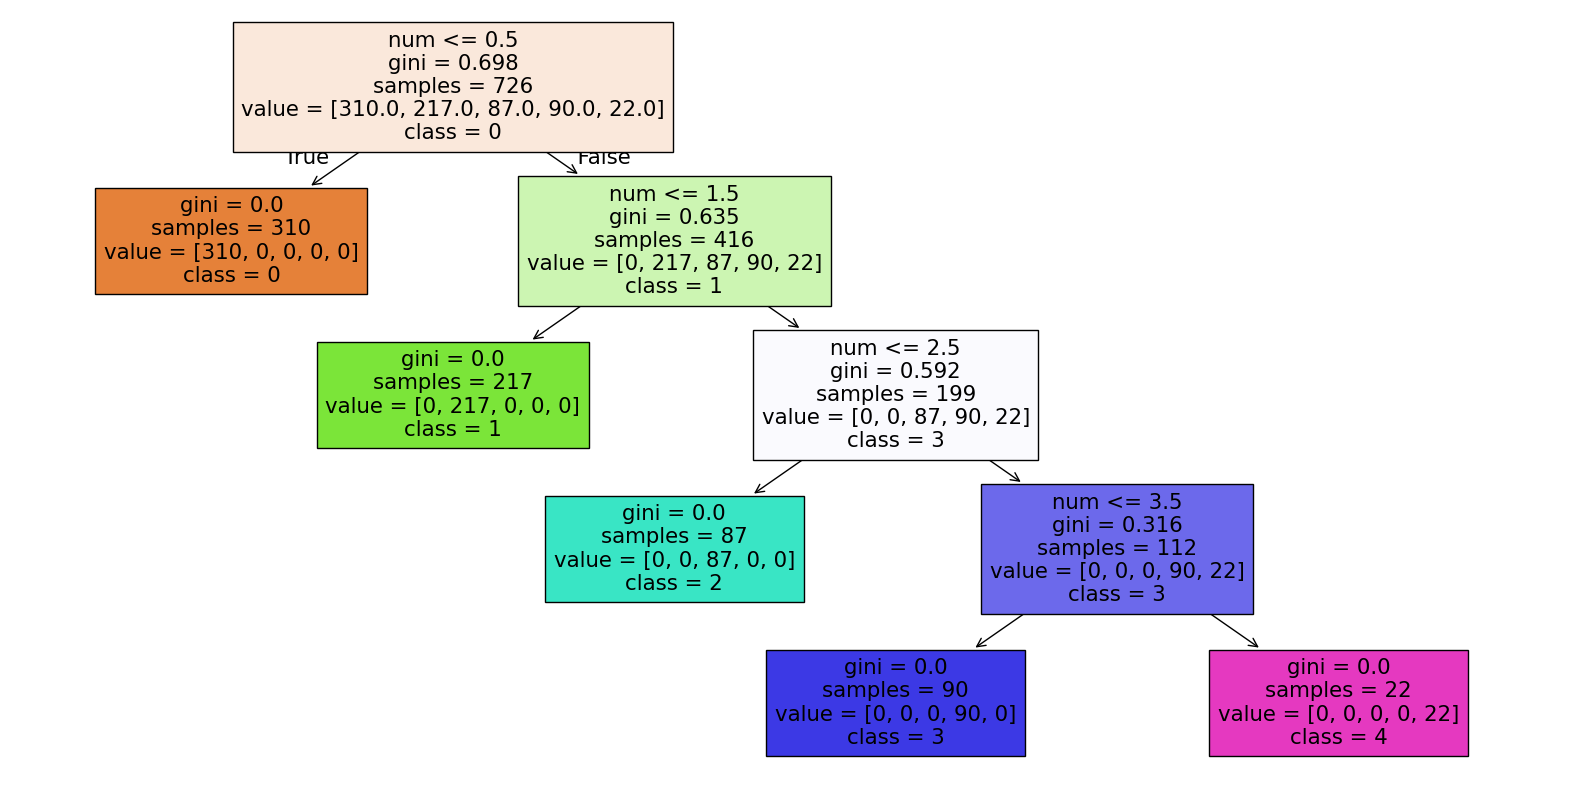

In [93]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    DT,
    filled=True,
    feature_names=X.columns,
    class_names=[str(c) for c in sorted(Y.unique())],  # include all classes
)
plt.show()

In [94]:
from sklearn.tree import DecisionTreeClassifier
n_nodes = DT.tree_.node_count
depth = DT.tree_.max_depth

print(f"Number of nodes: {n_nodes}")
print(f"Depth of the tree: {depth}")

Number of nodes: 9
Depth of the tree: 4


In [95]:
# before using hyperparameters like max_depth and minimum_sample_split the accuracies, precision
# f1 scores are 1.0 which i thought are overfitting so when i done cross-validation
# and using max_depth it reduced to 0.97 so i thought that would be sufficient. i also tried
# making max_depth = 2, but it turned out to give me 0.85 which i think is not efficient. 

In [96]:
# hyper parameters of decision tree:
# max_depth is one of the hyper parameters which is used to prevent overfitting. it is a kind
# of regualarization technique helps in limiting the depth and also enables the model performance
# better
# min_sample_split is also one of the hyper parameters which is required to split an internal node.
#larger values can make it more complicated so it splits into smaller values such that it
# can help reduce overfitting

In [97]:
# one hot encoding is a similar method of standardization that is used on 
#categorical variables to convert them in to 0 and 1 based. 
#and it is also known as dummy data. we use this to make the model standard and 
# for better fitting.

In [98]:
# label encoding is a technique to convert categorical variables into integers and will alot
# column names according to the case sensitivity and is more used for ordinal data

In [99]:
# changes that are asked to do the assignment 

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [ 2, 5, 10],
    'min_samples_leaf': [ 1, 2, 4],
    'splitter': ['best', 'random']
}

# Create base model
DT = DecisionTreeClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=DT,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

# Fit the grid search to the training data
grid_search.fit(X_train, Y_train)

# Get best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_DT = grid_search.best_estimator_

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [119]:
# model building

In [144]:
best_model = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=4,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

best_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [145]:
# prediction

In [146]:
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

In [147]:
training_accuracy = accuracy_score(Y_train, y_pred_train)
testing_accuracy = accuracy_score(Y_test, y_pred_test)

precision = precision_score(Y_test, y_pred_test, average='weighted', zero_division=0)
recall = recall_score(Y_test, y_pred_test, average='weighted', zero_division=0)
f1 = f1_score(Y_test, y_pred_test, average='weighted', zero_division=0)

In [148]:
print("\Model Performance using GridSearchCV:")
print("Training Accuracy:", np.round(training_accuracy, 2))
print("Testing Accuracy:", np.round(testing_accuracy, 2))
print("Precision:", np.round(precision, 3))
print("Recall:", np.round(recall, 3))
print("F1-score:", np.round(f1, 3))

\Model Performance using GridSearchCV:
Training Accuracy: 1.0
Testing Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [149]:
print("Best Parameters found:", grid_search.best_params_)

Best Parameters found: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [150]:
# when im using max_depth = 4 im getting 1.0 so i think its overfit and i changed its value to 
# max_depth= 3

In [151]:
# model2

In [153]:
best_model1 = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

best_model1.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [158]:
y1_pred_train = best_model1.predict(X_train)
y1_pred_test = best_model1.predict(X_test)

In [159]:
training_accuracy = accuracy_score(Y_train, y1_pred_train)
testing_accuracy = accuracy_score(Y_test, y1_pred_test)

precision = precision_score(Y_test, y1_pred_test, average='weighted', zero_division=0)
recall = recall_score(Y_test, y1_pred_test, average='weighted', zero_division=0)
f1 = f1_score(Y_test, y1_pred_test, average='weighted', zero_division=0)

In [160]:
print("\Model Performance using GridSearchCV:")
print("Training Accuracy:", np.round(training_accuracy, 2))
print("Testing Accuracy:", np.round(testing_accuracy, 2))
print("Precision:", np.round(precision, 3))
print("Recall:", np.round(recall, 3))
print("F1-score:", np.round(f1, 3))

\Model Performance using GridSearchCV:
Training Accuracy: 0.97
Testing Accuracy: 0.97
Precision: 0.947
Recall: 0.971
F1-score: 0.958
